# Compile and Clean Data

## Import Data  
Data is stored locally, point folder variable to your local directory where all the CSV files are stored.

In [2]:
import pandas as pd
import os
folder = r"D:\WORK\FLOODNET\NYC OEM Monthly"
files = os.listdir(folder)
files = [i for i in files if not "meta" in i]
print(files)

['floodnet-nov-2020.csv', 'floodnet-may-2022.csv', 'floodnet-oct-2020.csv', 'floodnet-nov-2021.csv', 'floodnet-oct-2022.csv', 'floodnet-oct-2021.csv', 'floodnet-may-2021.csv', 'floodnet-mar-2022.csv', 'floodnet-jun-2021.csv', 'floodnet-dec-2021.csv', 'floodnet-aug-2021.csv', 'floodnet-sep-2022.csv', 'floodnet-apr-2021.csv', 'floodnet-feb-2021.csv', 'floodnet-jan-2021.csv', 'floodnet-aug-2022.csv', 'floodnet-dec-2020.csv', 'floodnet-jul-2021.csv', 'floodnet-jun-2022.csv', 'floodnet-apr-2022.csv', 'floodnet-feb-2022.csv', 'floodnet-jan-2022.csv', 'floodnet-mar-2021.csv', 'floodnet-sep-2021.csv', 'floodnet-jul-2022.csv']


## Iterate over CSV's to create an a single DF

In [8]:
df = pd.DataFrame()

for file_path in files:
    temp = pd.read_csv( os.path.join(folder,file_path) )
    temp['time'] = pd.to_datetime( temp['time'] )
    df = pd.concat( [df,temp ] )

df.sample(5)

,time,deployment_id,depth_filt_mm,depth_proc_mm
58473,2021-03-17 01:54:57.650252+00:00,easily_dear_mouse,0.0,0.0
830,2021-01-01 19:32:07.216186+00:00,mainly_fond_boar,0.0,0.0
345030,2022-04-14 16:11:22.112000+00:00,vastly_saving_whale,NaN,NaN
39224,2022-02-03 23:23:43.164433+00:00,mainly_fond_boar,0.0,0.0
42493,2021-04-09 16:32:44.922594+00:00,duly_pro_vervet,0.0,0.0


In [23]:
df = df.reset_index(drop=True)

## Clean Data

### Remove NAN's if both measurments are NAN

In [24]:
df = df.dropna( subset=['depth_filt_mm','depth_proc_mm'] , axis = 0 )

In [25]:
print( "{} sensors are in the dataset".format( df['deployment_id'].nunique() ) )
df.groupby('deployment_id').size()

32 sensors are in the dataset


deployment_id
asleep_apricot_bedbug     118637
boring_olive_stingray     110443
daily_gentle_beetle       146324
daily_happy_satyr         274873
daily_mutual_gnat           6845
daily_new_falcon          571141
duly_pro_vervet           694389
duly_star_bee             163059
early_still_frog          140417
easily_cosmic_slug        166554
easily_dear_mouse         674549
evenly_divine_dingo        68693
future_aqua_wildcat        14511
gladly_mint_snail         246518
handsome_violet_leech      50967
highly_equal_doe           25086
jolly_tender_squid        104896
mainly_fond_boar          708356
mainly_whole_slug          75924
mildly_calm_ibex          138161
openly_driven_tarpon      110110
overly_heroic_squid       136246
really_vocal_puma          57269
simply_pet_joey            73556
slowly_fast_sawfly        282661
tired_red_monkey           16661
total_moccasin_dolphin    103214
ugliest_cyan_elephant      42090
vastly_saving_whale       156630
weekly_fair_dove          141

## Sample Viz

<AxesSubplot:xlabel='time', ylabel='depth_proc_mm'>

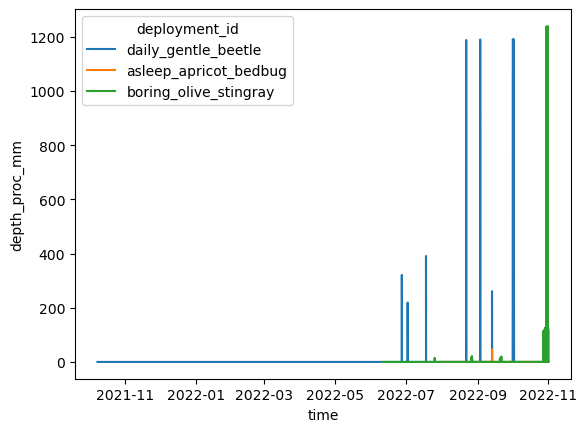

In [29]:
import seaborn as sns
#Small sample of the data just to see
sensors = ['asleep_apricot_bedbug','boring_olive_stingray','daily_gentle_beetle' ]

sns.lineplot(
    data = df[ (df['deployment_id'].isin(sensors))  ].copy() ,
    x = 'time',
    y = 'depth_proc_mm',
    hue = 'deployment_id'
)

### Weekly aggregation of flood values.  
Sensor name vs Time

<AxesSubplot:xlabel='time', ylabel='deployment_id'>

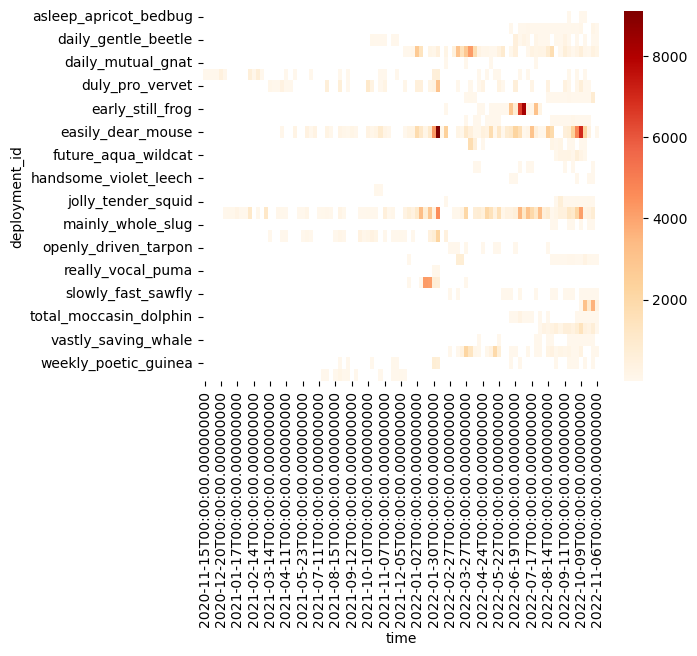

In [48]:
pt = pd.pivot_table(
    data = df[ df[['depth_filt_mm','depth_proc_mm']].sum(axis=1) > 0 ],
    index = 'deployment_id',
    columns=pd.Grouper(key='time', freq='W'),
    aggfunc=len,
    values  = 'depth_filt_mm'
)

sns.heatmap(
    data = pt,
    cmap = "OrRd"
)

## Spatial Data

In [53]:
sensor_locations = pd.read_excel( r"D:\WORK\FLOODNET\Sensor Locations Directory (1).xlsx" , sheet_name= 'street sensors (live)')

sensor_locations = sensor_locations[['sensor_display_name','deployment_id','lat','lon']].copy()
sensor_locations = sensor_locations.iloc[1:]
sensor_locations

,sensor_display_name,deployment_id,lat,lon
1,BK - 4th Av/Garfield Pl,daily_gentle_beetle,40.675855,-73.983944
2,BK - 9th St/Smith St (RETIRED),widely_proud_lizard,40.673654,-73.995396
3,BK - 9th St/Smith St,overly_heroic_squid,40.673401,-73.994892
4,BK - Carroll St/4th Av,weekly_poetic_guinea,40.676281,-73.984089
5,BK - Columbia St/Bay St,vastly_saving_whale,40.673267,-74.008418
6,BK - Dwight St/King St,openly_driven_tarpon,40.676293,-74.008641
7,BK - Gerry St/Union Av,(not live yet),40.699881,-73.949919
8,BK - Henry St/Mill St,jolly_tender_squid,40.675734,-74.003396
9,BK - Hoyt St/5th St,daily_new_falcon,40.676672,-73.994591
10,BK - Lorraine St/Henry St,early_still_frog,40.673707,-74.00435


### Create Geospatial Data from Sensor locations  
You can join the above heatmap or similar data using deployment name.  
**I'd suggest using aggregated data. In Raw format this data is enourmous.**

<AxesSubplot:>

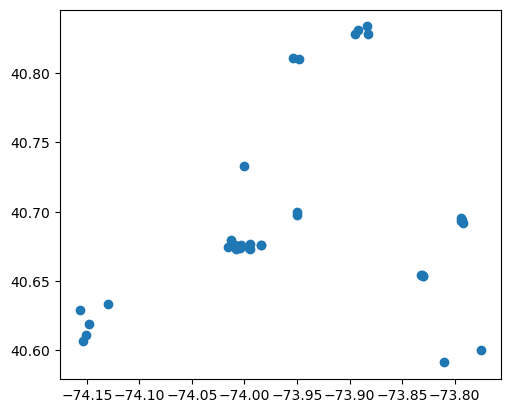

In [57]:
import geopandas as gpd

sensor_locations_geo = gpd.GeoDataFrame(
    data = sensor_locations,
    geometry=gpd.points_from_xy( sensor_locations['lon'],sensor_locations['lat'] ),
    crs = 4326
)

sensor_locations_geo.plot()